# Big Data Visualisation - Project : Titanic dataset

Pierre B.   
Mélanie D.  

## Part I : Visualisation and Storytelling

### Introduction

#### Context

The Titanic, the most luxurious ship of her time, suffered a tragic fate on her inaugural voyage on April 15, 1912. After colliding with an iceberg, the "unsinkable liner" sank in the North Atlantic.

The sinking was exacerbated by deficiencies in evacuation procedures and the limited number of lifeboats, resulting in the death of 1502 out of 2224 passengers and crew.

The investigations that followed led to major reforms in maritime regulations, redefining safety standards at sea. Every year, the world remembers the Titanic, a poignant reminder of human fragility against nature's implacable power.

#### Objective

The aim is to analyze data on the passengers who were on board the Titanic (ie name, age, gender, socio-economic class, etc), and try to detect correlations in order to determine if particular parameters had an influence on the chance of passenger survival
  
The dataset used here is from Kaggle : https://www.kaggle.com/competitions/titanic/
    
The data characteristics (variables) are as follows :
- **survival** : If the passenger has survival (0 = No, 1 = Yes)
- **pclass** : Ticket class	(1 = 1st, 2 = 2nd, 3 = 3rd)
- **name** : Passenger's name
- **passengerId** : Passenger's id
- **sex** : Sex
- **Age** :	Passenger's age (in years)
- **sibsp** :	# of siblings / spouses aboard the Titanic
- **parch** :	# of parents / children aboard the Titanic
- **ticket** : Ticket number
- **fare** : Passenger fare
- **cabin** :	Cabin number
- **embarked** : Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

### All librairies used

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import pointbiserialr
from sklearn.manifold import locally_linear_embedding as LLE
from sklearn.manifold import MDS
from sklearn.manifold import TSNE
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

### Data description

In [ ]:
input_file = "titanic.csv"

df = pd.read_csv(input_file, header = 0)
headers = list(df.columns.values)

df.head()
print(f"Train shape: {df.shape}")
df.tail()

Train shape: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


#### Type of values

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


#### Analysis :
As we can see, some features are numeric, while others are categories (like gender, for example). Among the numerical features, some are discrete variables, while others are continuous variables :

- Categorical features : Survived, Sex, Embarked, Pclass.
- Continous features : Age, Fare / Discrete features : SibSp, Parch.


#### Description of values

Let's use the function describe(), which generates descriptive statistics of the DataFrame. For numerical columns, it provides count, mean, standard deviation, minimum, 25th percentile, median (50th percentile), 75th percentile, and maximum values. For non-numeric (e.g., categorical) columns, it provides count, unique, top (most frequent value), and frequency of the top value. The result is a summary table that helps understand the distribution and central tendency of the data.

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


#### Analysis

- The dataset contains 891 values, whuch represents 40% of the actual numbers of passengers (2224).
- The survival rate is around 38% (according to the mean), which is higher than the actual survival rate (32%).
- Fares varied significantly with few passengers (<1%) paying as high as 512 dollars.

### Data cleaning

Data cleaning is crucial because it ensures accuracy in analysis and modeling, improves model performance, enhances data visualization, avoids bias, increases confidence in results, ensures compatibility with algorithms, reduces storage costs, complies with standards and regulations, and so on.

To check if it exists null values, we use "isnull().sum()", which prints the count of null (missing) values in each column of the DataFrame.

In [ ]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


#### Analysis
According to the result above, some columns have null values : the columns "Cabin", "Embarked" and "Age". On the one hand, "Cabin" and "Embarked" do not seem relevant to our case study. We therefore disregard them. On the other hand, the "Age" feature seems interesting. For this reason, we will replace all null values with the average of the column values, in order to keep the consistency of the information intact.


In [ ]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

Now, if we rerun "isnull().sum()", we'll see that the column "Age" no longer contain null values :

In [ ]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


### Hypothesis of possible correlations based on context

According to the passenger evacuation procedure on the night of the sinking (source: https://fr.wikipedia.org/wiki/Titanic), women and children were evacuated first. Additionally, 1st and 2nd class passengers were also given priority over 3rd class passengers, as they were closer to the lifeboats.

From this, we can deduce that certain features correlate with survival rate, such as "Age", "Sex", and "Pclass".

#### Correlation by passenger class

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


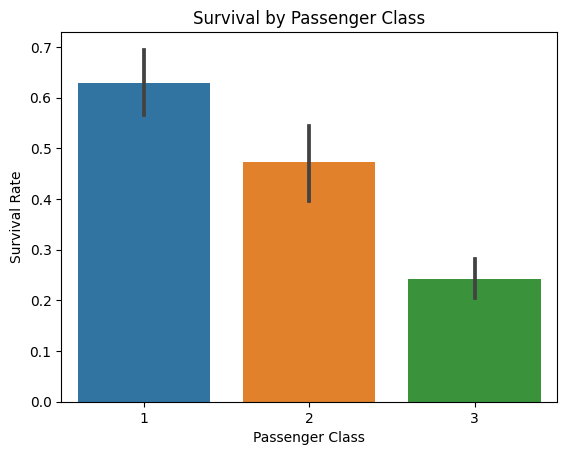

In [ ]:
print(df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False))

sns.barplot(x='Pclass', y='Survived', data=df)
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.title('Survival by Passenger Class')
plt.show()

The survival rate is highest for 1st class passengers, followed by 2nd class and 3rd class passengers, which is coherent with the information given above.

#### Correlation by Sex

      Sex  Survived
0  female  0.742038
1    male  0.188908


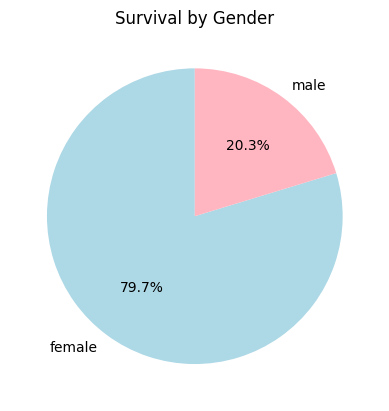

In [ ]:
print(df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False))

gender_survival = df.groupby('Sex')['Survived'].mean()
gender_survival.plot.pie(autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightpink'])
plt.title('Survival by Gender')
plt.ylabel('')
plt.show()

74% of the women present on the Titanic survived, compared to only 18% of the men. In relation, from all those who survived, almost 80% were females, and 20% males.

This could be explained by the simple rule followed when a catastrophic event happens on a boat: we prioritize the saving of women and childrens first.

#### Correlation by age

       AgeGroup  Survived
0   [0.0, 10.0)  0.612903
1  [10.0, 15.0)  0.437500
2  [15.0, 25.0)  0.365000
3  [25.0, 35.0)  0.343915
4  [35.0, 50.0)  0.416149
5  [50.0, 60.0)  0.416667
6  [60.0, 70.0)  0.315789
7   [70.0, inf)  0.142857


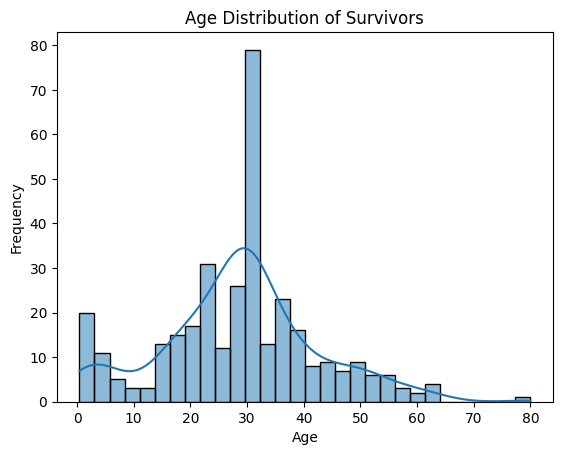

In [ ]:
age_bins = [0, 10, 15, 25, 35, 50, 60, 70, float('inf')]

df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, right=False)

age_group_survival = df.groupby('AgeGroup')['Survived'].mean().reset_index()

print(age_group_survival)


sns.histplot(data=df[df['Survived'] == 1], x='Age', bins=30, kde=True)
plt.title('Age Distribution of Survivors')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

While only 34% of them survived, people aged around 30 are the ones who survived the most of the catastroph.

#### Correlation by Embarkation Point

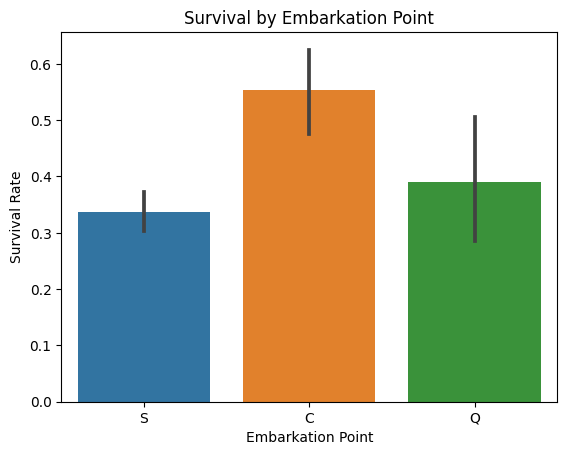

In [ ]:
sns.barplot(x='Embarked', y='Survived', data=df)
plt.xlabel('Embarkation Point')
plt.ylabel('Survival Rate')
plt.title('Survival by Embarkation Point')
plt.show()

While we can see some minors differences, the embarkation point doesn't seem to be a major factor in the survival of the passengers.

#### Correlation by family size

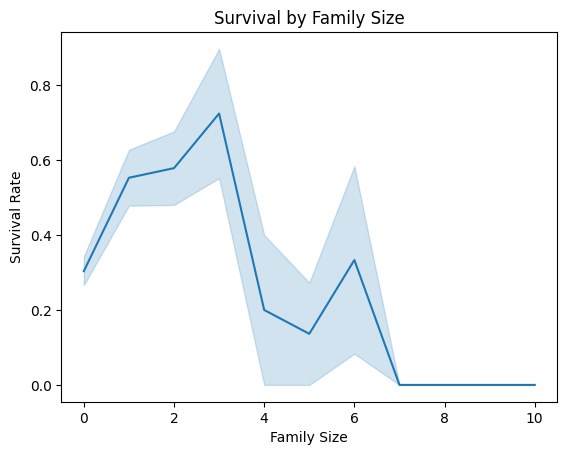

In [ ]:
df['FamilySize'] = df['SibSp'] + df['Parch']

sns.lineplot(data=df, x='FamilySize', y='Survived')
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')
plt.title('Survival by Family Size')
plt.show()

We can see that smaller families with fewer children got a higher chance of surviving altogether, which goes along the fact that more women survived with their children.

### Conclusion

In this part, we began by understanding the data, then describing it statistically. Then we cleaned up the data, replacing missing values. Finally, we found possible correlations based on what actually happened on the evening of the Titanic's sinking.

In the next part, we'll use data visualization methods to find correlations based on the results obtained, enabling us to reduce the dimensionality of the data to keep only the most important features. Then, we will apply :
- different manifold learning (projections) approaches on the datasetby visualising the results in 2D or 3D. Apply an external validation process (classification and/or regression) to choose the best method,
- an external validation process (classification and/or regression) to choose the best method.
After that, we will explain the model and why it works best for this problem/dataset.
To conclude, we will analyse how the projection results can be improved and propose some solutions related to this dataset.

## Part II - Manifold learning for Visualisation

### Correlation matrix

First of all, we're going to remove the "PassengerId" column from our dataframe, because it's not useful here. As the standard correlation coefficient (such as Pearson's correlation coefficient) is designed to measure linear relationships between numerical variables, we'll map the "male" and "female" values in the "Sex" column to numerical values: we've chosen to assign the value 1 for "male" and 2 for "female". Now we can create our correlation matrix.

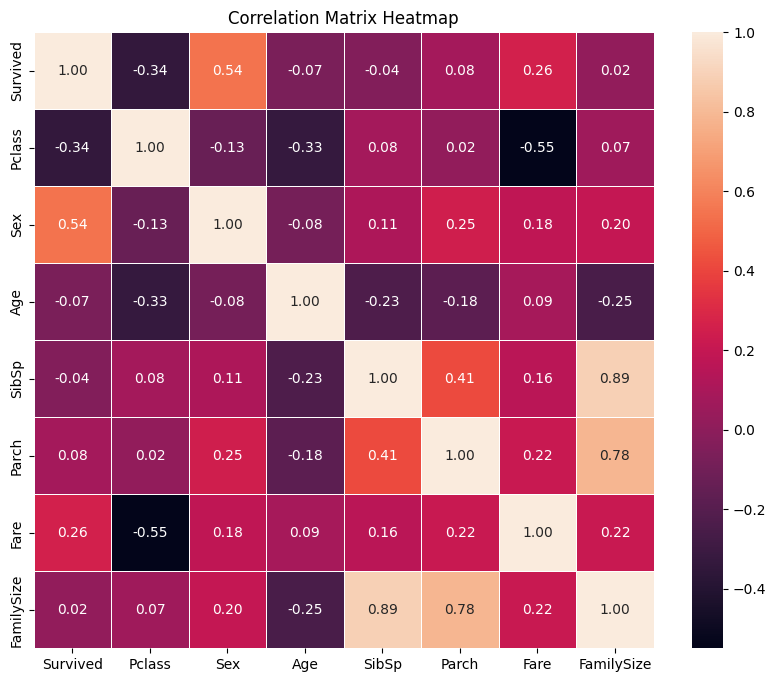

In [ ]:
df.drop('PassengerId', axis=1, inplace=True)

sex_mapping = {"male": 1, "female": 2}

df['Sex'] = df['Sex'].map(sex_mapping)

numerical_columns = df.select_dtypes(include=['int64', 'float64'])

correlation_matrix = numerical_columns.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

#### Analysis

We can see that 3 features stand out from the rest: "Fare", "Sex" and "Pclass". The first two columns are positively correlated, whereas "Pclass" is negatively correlated, which is logical, because "Pclass" and "Fare" are linked : The higher is the fare of the passenger, the lower is his/her class.

Now, we will apply different manifold learning (projections) approaches on the dataset by visualising the results in 2D. Then, we will apply an external validation process (classification and/or regression) to choose the best method.

### LLE method

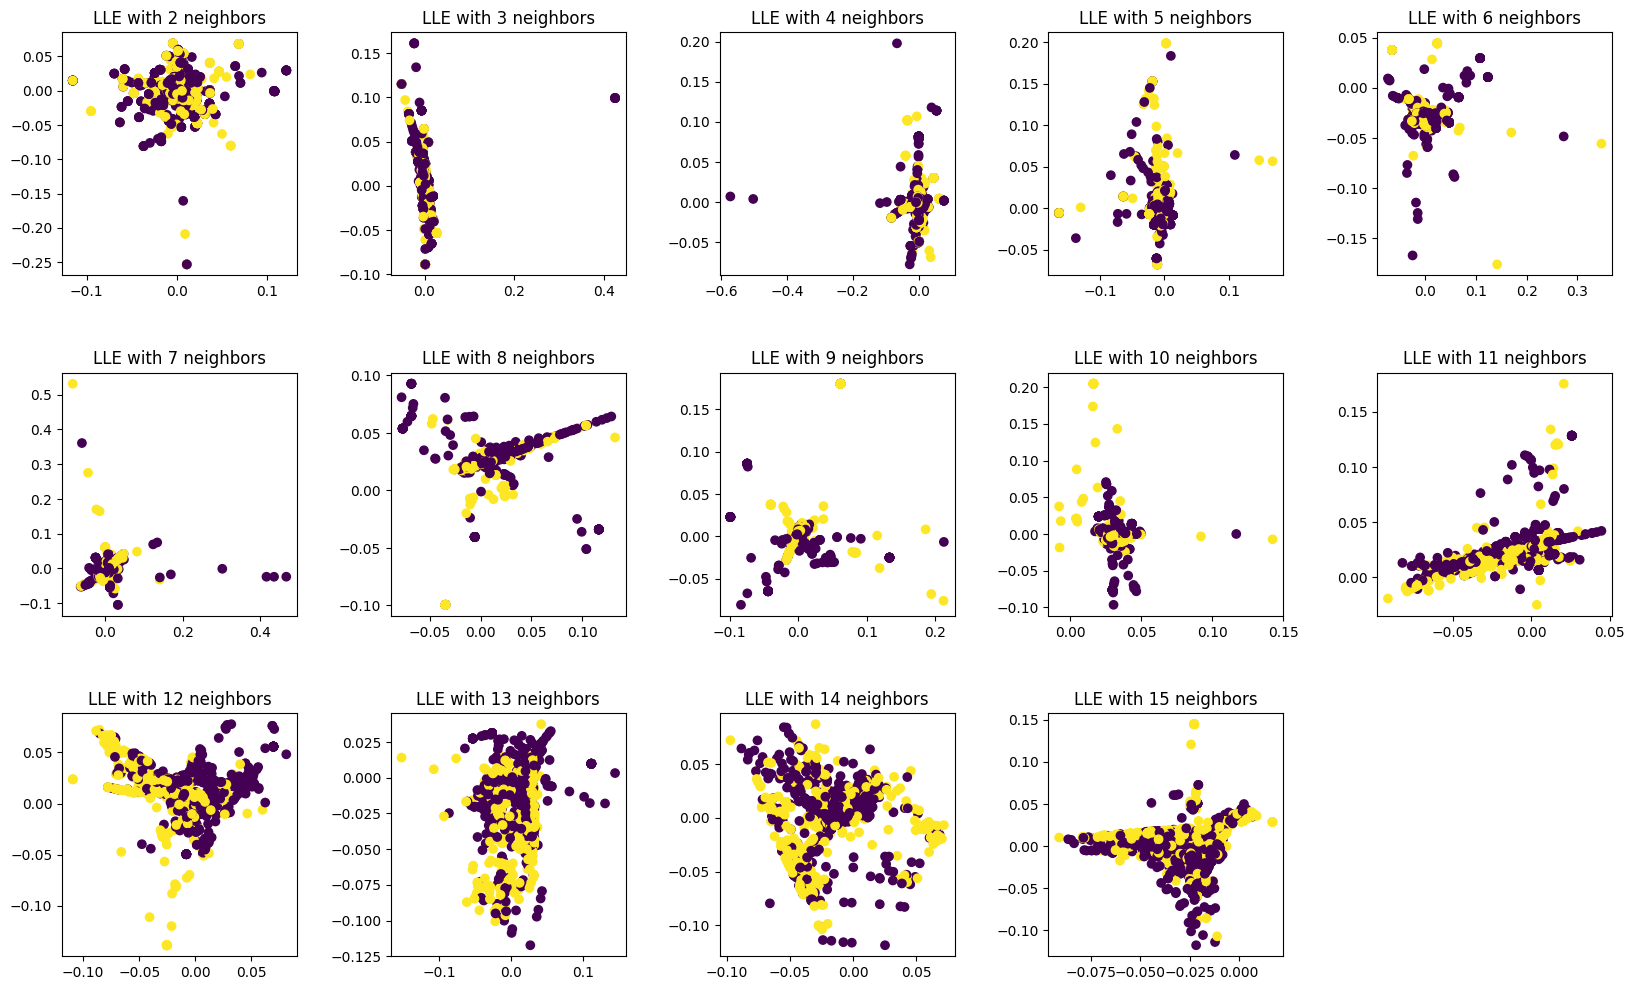

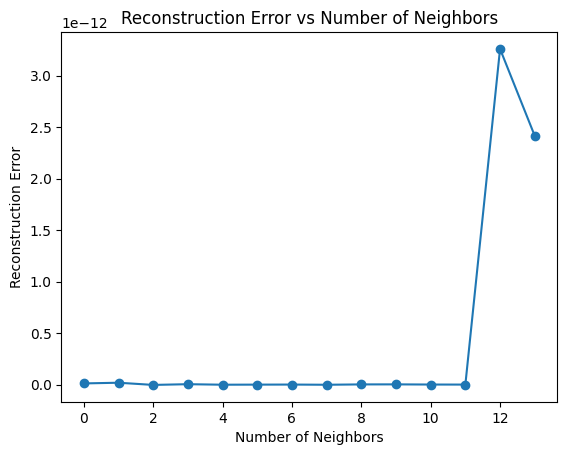

In [ ]:
numerical_columns = df.select_dtypes(include=['int64', 'float64'])
df = df[numerical_columns.columns]
df_lle, error = LLE(df, n_neighbors=5, n_components=2, eigen_solver='dense')

neighbors = 2
errors_list = []
plt.figure(figsize=(20, 12))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

while neighbors <= 15:
    df_lle, error = LLE(df, n_neighbors=neighbors, n_components=2, eigen_solver='dense')
    errors_list.append(error)
    plt.subplot(3, 5, neighbors - 1)
    plt.scatter(df_lle[:, 0], df_lle[:, 1], c=df['Survived'])
    plt.title(f'LLE with {neighbors} neighbors')
    neighbors += 1

neighbors_range = range(len(errors_list))
plt.figure()
plt.plot(neighbors_range, errors_list, marker='o')
plt.title('Reconstruction Error vs Number of Neighbors')
plt.xlabel('Number of Neighbors')
plt.ylabel('Reconstruction Error')
plt.show()

### Multi dimensional scaling with manifold.MDS

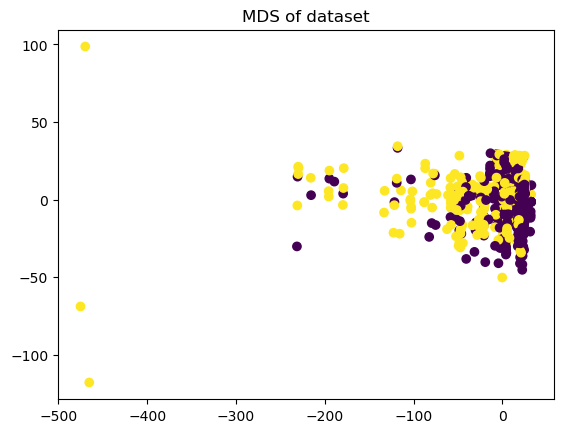

In [ ]:
mds = MDS(n_components=2, normalized_stress='auto')
df_mds = mds.fit_transform(df)
plt.figure()
plt.scatter(df_mds[:, 0], df_mds[:, 1], c=df['Survived'])
plt.title('MDS of dataset')
plt.show()

### t-SNE model with Manifold.TSNE

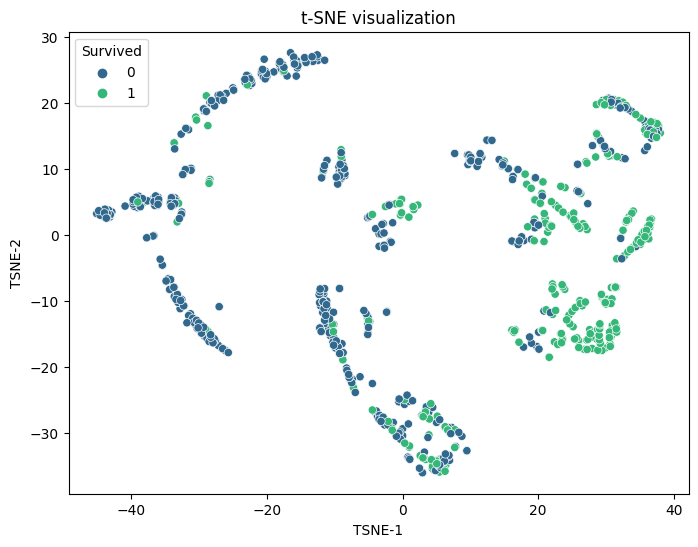

In [ ]:
from sklearn.manifold import TSNE

features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']

x = df.loc[:, features].values
x = StandardScaler().fit_transform(x)

tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000, learning_rate=200)
tsne_results = tsne.fit_transform(x)

tsne_df = pd.DataFrame(data=tsne_results, columns=['TSNE-1', 'TSNE-2'])
tsne_df['Survived'] = df['Survived'].astype(str)

plt.figure(figsize=(8, 6))
sns.scatterplot(x='TSNE-1', y='TSNE-2', hue='Survived', data=tsne_df, palette='viridis', legend='full')
plt.title('t-SNE visualization')
plt.legend(title='Survived', loc='best')
plt.show()

We can clearly see that there are some clusters which shows a higher death rate than the others clusters. We can conclude that there are some features that increases the chance to die on the Titanic.
This might be related to the male sex, or some age groups.

### Principal component analysis

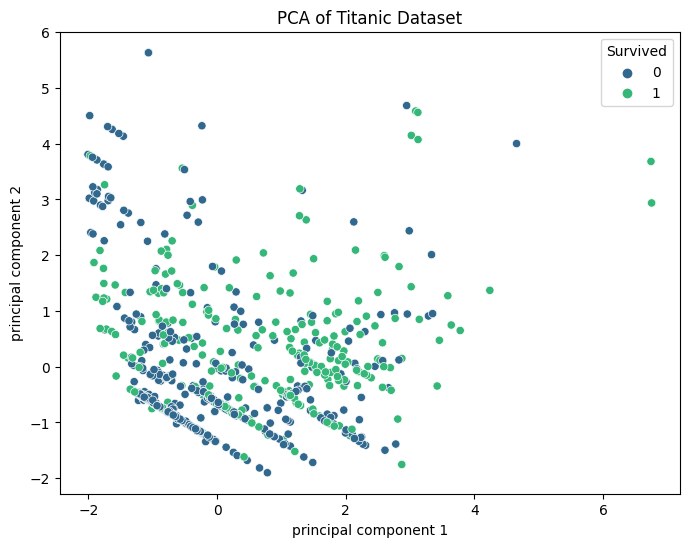

In [ ]:
df['Sex'] = df['Sex'].map({'female': 0, 'male': 1})

# Handling missing values
df['Sex'].fillna(0, inplace=True)
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)


features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
x = df.loc[:, features].values
x = StandardScaler().fit_transform(x)


pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data=principalComponents, columns=['principal component 1', 'principal component 2'])
principalDf['Survived'] = df['Survived'].astype(str)

plt.figure(figsize=(8, 6))
sns.scatterplot(data=principalDf, x='principal component 1', y='principal component 2', hue='Survived', palette='viridis')
plt.title('PCA of Titanic Dataset')
plt.legend(title='Survived', loc='best')
plt.show()

From this PCA plot, while we can see some minor correlation, we can easily conclude that there are no clear relations between the properties and the survival of the passengers. Further and more precise analysis is needed.

### Apply an external validation process

In [ ]:
X = df.drop('Survived', axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=5, random_state=45)
X_train_lle = lle.fit_transform(X_train)
X_test_lle = lle.transform(X_test)

X_train_mds = mds.fit_transform(X_train)
X_test_mds = mds.fit_transform(X_test)

X_train_tsne = tsne.fit_transform(X_train)
X_test_tsne = tsne.fit_transform(X_test)

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.fit_transform(X_test)

# Random Forest method

rf_classifier = RandomForestClassifier(random_state=40)

rf_classifier.fit(X_train_lle, y_train)
y_pred_lle = rf_classifier.predict(X_test_lle)
accuracy_lle = accuracy_score(y_test, y_pred_lle)

rf_classifier.fit(X_train_mds, y_train)
y_pred_mds = rf_classifier.predict(X_test_mds)
accuracy_mds = accuracy_score(y_test, y_pred_mds)

rf_classifier.fit(X_train_tsne, y_train)
y_pred_tsne = rf_classifier.predict(X_test_tsne)
accuracy_tsne = accuracy_score(y_test, y_pred_tsne)

rf_classifier.fit(X_train_pca, y_train)
y_pred_pca = rf_classifier.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)

print("Accuracy - LLE (RandomForest) :", accuracy_lle)
print("Accuracy - MDS (RandomForest) :", accuracy_mds)
print("Accuracy - t-SNE (RandomForest) :", accuracy_tsne)
print("Accuracy - PCA (RandomForest) :", accuracy_pca)

# Logistic Regression Method
logreg = LogisticRegression(random_state=42)

logreg.fit(X_train_lle, y_train)
y_pred_lle = logreg.predict(X_test_lle)
accuracy_lle = accuracy_score(y_test, y_pred_lle)

logreg.fit(X_train_mds, y_train)
y_pred_mds = logreg.predict(X_test_mds)
accuracy_mds = accuracy_score(y_test, y_pred_mds)

logreg.fit(X_train_tsne, y_train)
y_pred_tsne = logreg.predict(X_test_tsne)
accuracy_tsne = accuracy_score(y_test, y_pred_tsne)

logreg.fit(X_train_pca, y_train)
y_pred_pca = logreg.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)

# Étape 6-7: Comparer les résultats
print("Accuracy - LLE (Logistic Regression):", accuracy_lle)
print("Accuracy - MDS (Logistic Regression):", accuracy_mds)
print("Accuracy - t-SNE (Logistic Regression):", accuracy_tsne)
print("Accuracy - PCA (Logistic Regression):", accuracy_pca)

Accuracy - LLE (RandomForest) : 0.6815642458100558
Accuracy - MDS (RandomForest) : 0.5977653631284916
Accuracy - t-SNE (RandomForest) : 0.5921787709497207
Accuracy - PCA (RandomForest) : 0.6256983240223464
Précision - LLE (Régression logistique): 0.6536312849162011
Précision - MDS (Régression logistique): 0.6871508379888268
Précision - t-SNE (Régression logistique): 0.6536312849162011
Précision - PCA (Régression logistique): 0.664804469273743


#### What's the best method ?
We get a similar conclusion as with PCA model, there are no clear winner here, no models can provide enough clarity in the dataset, thus indicating that there are complex relationships with the dataset.
Even though there are some factors that could help in the survival, as for example the sex or age, it is still clear that there's a huge part of randomness, caused by the nature of the data: a catasrtoph.

#### Conclusion

Projection results can be improved in a number of ways:
- First, we can vary the parameters of the methods to change the result. For example, for the LLe method, we changed the number of neighbors.
- For the accuracy results, we chose the "random forest" and "regression logistic" methods, as they are classification methods, which is the most appropriate for our dataset, as the aim is to predict whether a passenger is dead or not. However, other methods may also be appropriate.
- As for splitting the dataset into 2 sets (train, test), it is also possible to change the "random state" parameter to obtain different results.